# **Research question:**  
How do visits of the **Octoberfest** in Munich change in response to higher **beer prices** and bad **weather**?

For the purpose of this analysis, **official datasets** from the city of Munich are used, that can be found under the following link: https://opendata.muenchen.de/dataset. The defined variables are in German and when appropriate and not directly inferrable, English translations are provided for easier comprehension.



In [11]:
### Loading in of datasets

### Import necessary modules
import pandas as pd
import matplotlib.pyplot as plt

### This dataset encompasses weather information on humidity, temperature, rain and hours of sunshine from 2000 to 2021
df_weather = pd.read_csv(r'C:\Users\andre\Desktop\Coursera\Applied Plotting, Charting & Data Representation in Python\Week 4\monatszahlen2112_witterung.csv')

### This dataset encompasses information on the German Octoberfest with respect to the number of visitors (in mio.), 
### the number of visitors per day, the price of beer, the consumption of beer (in litres), 
### the price of a commonly eaten food dish (Hendl, some type of chicken) and its consumption (in units)
### from 1985 to 2019
df_octoberfest = pd.read_csv(r'C:\Users\andre\Desktop\Coursera\Applied Plotting, Charting & Data Representation in Python\Week 4\oktoberfestgesamt19852019.csv')

## Description of datasets

Let's take a preliminary look at the datasets with the ***head*-method** of pandas:

In [13]:
df_weather.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Luftfeuchtigkeit,Mittlere relative Luftfeuchtigkeit,2021,202101,79.0,76.0,-3.66,3.95,70.0
1,Luftfeuchtigkeit,Mittlere relative Luftfeuchtigkeit,2021,202102,72.0,65.0,-8.86,10.77,71.0
2,Luftfeuchtigkeit,Mittlere relative Luftfeuchtigkeit,2021,202103,65.0,64.0,-9.72,1.56,71.0
3,Luftfeuchtigkeit,Mittlere relative Luftfeuchtigkeit,2021,202104,60.0,49.0,-7.69,22.45,72.0
4,Luftfeuchtigkeit,Mittlere relative Luftfeuchtigkeit,2021,202105,67.0,67.0,11.67,0.00,72.0


Our **key variables** of interest (namely temperature, rain and hours of sunshine) of the dataset ***df_weather*** are the following:

In [28]:
df_weather[df_weather.MONATSZAHL.isin(['Lufttemperatur','Niederschlag','Sonnenschein'])]

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
264,Lufttemperatur,Höchste Lufttemperatur,2021,202101,14.5,14.5,NaN,NaN,24.0
265,Lufttemperatur,Höchste Lufttemperatur,2021,202102,20.0,17.2,NaN,NaN,24.0
266,Lufttemperatur,Höchste Lufttemperatur,2021,202103,22.7,19.4,NaN,NaN,24.0
267,Lufttemperatur,Höchste Lufttemperatur,2021,202104,23.3,25.2,NaN,NaN,24.0
268,Lufttemperatur,Höchste Lufttemperatur,2021,202105,30.7,26.4,NaN,NaN,24.0
...,...,...,...,...,...,...,...,...,...
1887,Sonnenschein,Sonnenscheindauer,2000,200008,250.0,NaN,37.36,NaN,180.0
1888,Sonnenschein,Sonnenscheindauer,2000,200009,164.0,NaN,-34.40,NaN,178.0
1889,Sonnenschein,Sonnenscheindauer,2000,200010,63.0,NaN,-61.59,NaN,167.0
1890,Sonnenschein,Sonnenscheindauer,2000,200011,100.0,NaN,58.73,NaN,160.0


The column 'AUSPRAEGUNG' stands for property of the underlying variable and allows to differentiate - among others - between min, max and its average. For this analysis, we will usually solely employ the given **mean average** of a variable (if applicable) for a month. This is an acceptable approach, as the Octoberfest is an annual festivity taking place usually from the midst of September to the beginning of October (and hence not throughout). 

In [68]:
df_weather.AUSPRAEGUNG.unique()

array(['Mittlere relative Luftfeuchtigkeit', 'Höchste Lufttemperatur',
       'Mittlere Lufttemperatur', 'Tiefste Lufttemperatur',
       'Niederschlagsmenge insgesamt', 'Tage mit Niederschlägen',
       'Sonnenscheindauer'], dtype=object)

Our **key variables** of interest (namely number of visitors (in mio.), the number of visitors per day, the price of beer and its consumption (in litres) of the dataset ***df_octoberfest*** are the following:

In [26]:
df_octoberfest[['besucher_gesamt','besucher_tag','bier_preis','bier_konsum']].head()

,besucher_gesamt,besucher_tag,bier_preis,bier_konsum
0,7.1,444,3.20,54541
1,6.7,419,3.30,53807
2,6.5,406,3.37,51842
3,5.7,356,3.45,50951
4,6.2,388,3.60,51241


## Descriptive and visual analysis of key variables
### Weather

#### Temperature

In [35]:
### Let's create a dataframe for every key variable that we define for the purpose of simplicity
df_temp = df_weather[df_weather.MONATSZAHL == 'Lufttemperatur']

### We will stick to certain columns only, namely the year, the month and the respective value
df_temp = df_temp[['JAHR','MONAT','WERT']]
df_temp

,JAHR,MONAT,WERT
264,2021,202101,14.5
265,2021,202102,20.0
266,2021,202103,22.7
267,2021,202104,23.3
268,2021,202105,30.7
...,...,...,...
1051,2000,200008,10.9
1052,2000,200009,6.6
1053,2000,200010,4.5
1054,2000,200011,-2.4


In [43]:
### What was the average/median temperature in Munich from 2000 to 2021?
print('The mean temperature in Munich was: {:.2f} degrees Celsius.'.format(df_temp.WERT.mean()))
print('The median temperature in Munich was: {:.2f} degrees Celsius.'.format(df_temp.WERT.median()))

### The median (which is less prone to outliers) is slightly smaller
### Yes, living in Munich, Germany is not comparable to the weather conditions in Barcelona, Spain - unfortunately

The mean temperature in Munich was: 11.42 degrees Celsius.
The median temperature in Munich was: 10.50 degrees Celsius.


Text(0, 0.5, 'Degrees Celsius')

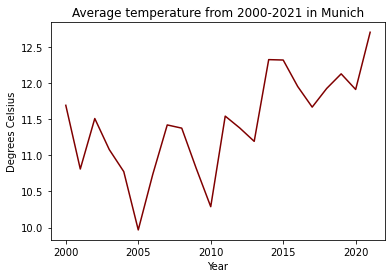

In [125]:
### Let's plot the average temperature per year in Munich from 2000 to 2021 as a line plot with Matplotlib:
plt.plot(df_temp.groupby(by='JAHR').mean().index, df_temp.groupby(by='JAHR').mean(), color='maroon')
plt.title('Average temperature from 2000-2021 in Munich')
plt.xlabel('Year')
plt.ylabel('Degrees Celsius')

#### Rain

In [82]:
### Let's create a dataframe for simplicity
df_rain = df_weather[df_weather.MONATSZAHL == 'Niederschlag']

### We will stick to the columns 'JAHR', 'MONAT' and 'WERT' as the year, the month and the respective values
### in mm
df_rain = df_rain[['JAHR','MONAT', 'WERT']]
df_rain

,JAHR,MONAT,WERT
1056,2021,202101,66.0
1057,2021,202102,46.0
1058,2021,202103,42.0
1059,2021,202104,38.0
1060,2021,202105,162.0
...,...,...,...
1601,2000,200008,15.0
1602,2000,200009,13.0
1603,2000,200010,15.0
1604,2000,200011,16.0


In [79]:
### What was the average/median amount of rain in Munich from 2000 to 2021?
print('The mean amount in rain in milimetres in Munich was: {:.2f}.'.format(df_rain.WERT.mean()))
print('The median amount in rain in milimetres in Munich was: {:.2f}.'.format(df_rain.WERT.median()))

### This allows us to determine that the mean and the median strongly differ from each other
### For which reason we can conclude preliminarily that this key variable exhibits a number of outliers
### that influences the mean considerably

The mean amount in rain in milimetres in Munich was: 52.68.
The median amount in rain in milimetres in Munich was: 23.00.


Text(0, 0.5, 'in milimetres')

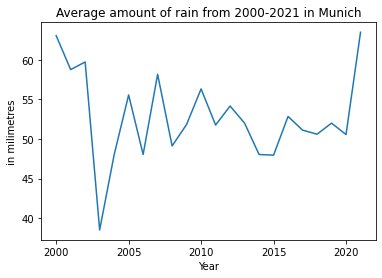

In [93]:
### Let's plot the average amount of rain per year in Munich from 2000 to 2021 as a line plot with Matplotlib:
plt.plot(df_rain.groupby(by='JAHR').mean().index, df_rain.groupby(by='JAHR').mean())
plt.title('Average amount of rain from 2000-2021 in Munich')
plt.xlabel('Year')
plt.ylabel('in milimetres')

#### Hours of sunlight

In [84]:
### Let's create a dataframe for simplicity
df_sun = df_weather[df_weather.MONATSZAHL == 'Sonnenschein']

### We will stick to the columns 'JAHR', 'MONAT' and 'WERT' as the year, the month and the respective values
### in hours of sunlight
df_sun = df_sun[['JAHR','MONAT', 'WERT']]
df_sun

,JAHR,MONAT,WERT
1606,2021,Summe,1705.0
1607,2021,202101,52.0
1608,2021,202102,147.0
1609,2021,202103,170.0
1610,2021,202104,203.0
...,...,...,...
1887,2000,200008,250.0
1888,2000,200009,164.0
1889,2000,200010,63.0
1890,2000,200011,100.0


In [90]:
### As the column month 'MONAT' further contains the sum of hours of sunlight (namely 'SUMME'), 
### it is important to remove those rows for the purpose of not biasing our analysis
df_sun = df_sun[df_sun.MONAT != 'Summe']
df_sun

,JAHR,MONAT,WERT
1607,2021,202101,52.0
1608,2021,202102,147.0
1609,2021,202103,170.0
1610,2021,202104,203.0
1611,2021,202105,180.0
...,...,...,...
1887,2000,200008,250.0
1888,2000,200009,164.0
1889,2000,200010,63.0
1890,2000,200011,100.0


In [91]:
### What was the average/median hours of sunlight in Munich from 2000 to 2021?
print('The mean hours of sunlight in Munich was: {:.2f}.'.format(df_sun.WERT.mean()))
print('The median hours of sunlight in Munich was: {:.2f}.'.format(df_sun.WERT.median()))

The mean hours of sunlight in Munich was: 158.97.
The median hours of sunlight in Munich was: 162.00.


Text(0, 0.5, 'Hours of sunlight')

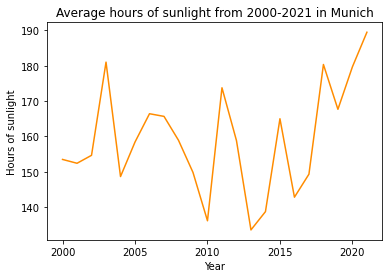

In [124]:
### Let's plot the average hours of sunlight per year in Munich from 2000 to 2021 as a line plot with Matplotlib:
plt.plot(df_sun.groupby(by='JAHR').mean().index, df_sun.groupby(by='JAHR').mean(), color='darkorange')
plt.title('Average hours of sunlight from 2000-2021 in Munich')
plt.xlabel('Year')
plt.ylabel('Hours of sunlight')

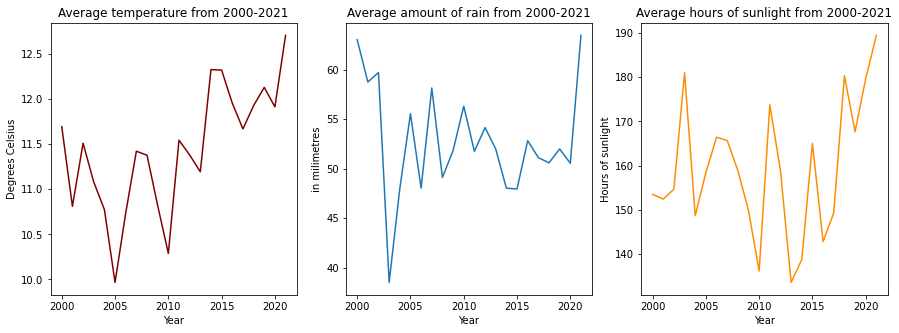

In [128]:

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=[15,5], sharex=True)

ax1.plot(df_temp.groupby(by='JAHR').mean().index, df_temp.groupby(by='JAHR').mean(), color='maroon')
ax2.plot(df_rain.groupby(by='JAHR').mean().index, df_rain.groupby(by='JAHR').mean())
ax3.plot(df_sun.groupby(by='JAHR').mean().index, df_sun.groupby(by='JAHR').mean(), color='darkorange')

ax1.set_title('Average temperature from 2000-2021')
ax1.set_xlabel('Year')
ax1.set_ylabel('Degrees Celsius')

ax2.set_title('Average amount of rain from 2000-2021')
ax2.set_xlabel('Year')
ax2.set_ylabel('in milimetres')

ax3.set_title('Average hours of sunlight from 2000-2021')
ax3.set_xlabel('Year')
ax3.set_ylabel('Hours of sunlight');

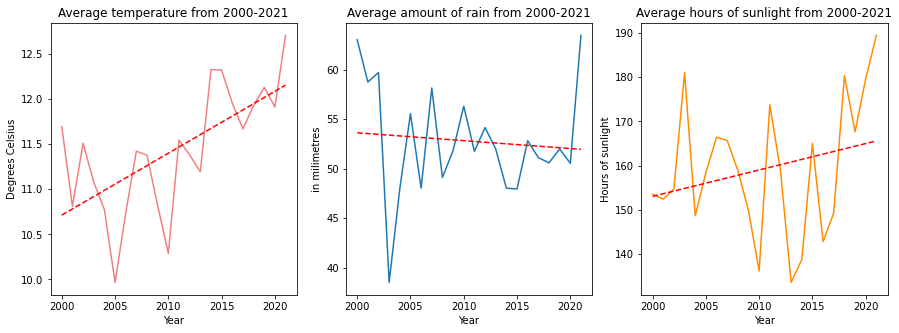

In [165]:
### If we display all three plots of the key variables temperature, rain and hours of sunlight, 
### in addition to adding a trend line,
### we obtain the following diagram:
import numpy as np

years = df_temp.groupby(by='JAHR').mean().index

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=[15,5], sharex=True)

fit = np.polyfit(years, df_temp.groupby(by='JAHR').mean(), 1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*years + intercept
ax1.plot(years, df_temp.groupby(by='JAHR').mean(), color='lightcoral')
ax1.plot(years, fit_eq, "r--")

fit = np.polyfit(years, df_rain.groupby(by='JAHR').mean(), 1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*years + intercept
ax2.plot(years, df_rain.groupby(by='JAHR').mean())
ax2.plot(years, fit_eq, "r--")

fit = np.polyfit(years, df_sun.groupby(by='JAHR').mean(), 1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*years + intercept
ax3.plot(years, df_sun.groupby(by='JAHR').mean(), color='darkorange')
ax3.plot(years, fit_eq, "r--")

ax1.set_title('Average temperature from 2000-2021')
ax1.set_xlabel('Year')
ax1.set_ylabel('Degrees Celsius')

ax2.set_title('Average amount of rain from 2000-2021')
ax2.set_xlabel('Year')
ax2.set_ylabel('in milimetres')

ax3.set_title('Average hours of sunlight from 2000-2021')
ax3.set_xlabel('Year')
ax3.set_ylabel('Hours of sunlight');

### This allows us to gain the insight that average temperatures have been steadily increasing in Munich
### The amount of rain has at the same time been decreasing slightly (however, there is a significant fall in rain in
### ~ 2003). For that reason it could likewise be conceivable that it has remained roughly constant over time
### The amount of sunlight available seems to be have been increasing
### This could make sense if increasing temperatures have lead to more evaporation of water reservoirs in and around Munich,
### therefore diminishing the number of clouds (and hence decreasing rain output overall)

### Octoberfest
#### Number of visitors

In [225]:
### Let's create a dataframe for simplicity
### In this case we will solely use the columns on year and on the total number of visitors of the Octoberfest per year in mio;
### from 1985 to 2019 and for the months of September to October
df_visitors = df_octoberfest[['jahr','besucher_gesamt']]
df_visitors.head()

,jahr,besucher_gesamt
0,1985,7.1
1,1986,6.7
2,1987,6.5
3,1988,5.7
4,1989,6.2


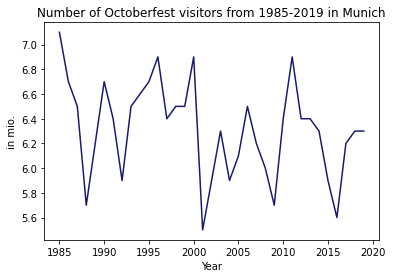

In [226]:
### Let's plot the number of Octoberfest visitors in Munich from 1985 to 2019 as a line plot with Matplotlib:
plt.plot(df_visitors['jahr'], df_visitors['besucher_gesamt'], color='midnightblue')
plt.title('Number of Octoberfest visitors from 1985-2019 in Munich')
plt.xlabel('Year')
plt.ylabel('in mio.');

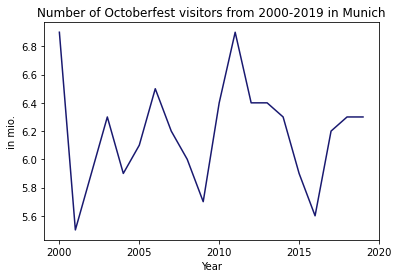

In [240]:
### As our dataset on weather is constrained with respect to the year 2000 and does not contain information on
### periods between 1985 to 1999, we need to adjust for this
years = [2000+year for year in range(20)]
df_visitors = df_octoberfest[['jahr','besucher_gesamt']]
df_visitors = df_visitors[df_visitors.jahr.isin(years)]
# df_visitors['jahr'] = df_visitors['jahr'].astype('int64')

### Let's re-plot the number of Octoberfest visitors in Munich from 2000 to 2019 as a line plot with Matplotlib:
plt.plot(df_visitors['jahr'], df_visitors['besucher_gesamt'], color='midnightblue')
# 2000+year for year in range(20)

plt.title('Number of Octoberfest visitors from 2000-2019 in Munich')
plt.xlabel('Year')
plt.ylabel('in mio.')
plt.xticks([2000,2005,2010,2015,2020]);
### The line plot exhibits for the year 2003 a sharp downfall
### The overall trend however - including both sharp increases and decreases - seems to have remained rather stable 
### at around 6.2 mio.
### We will investigate this in the continuing analysis

#### Price of beer

In [243]:
### Let's create a dataframe for simplicity
### In this case we will solely use the columns on year and on the beer price in € per glass (also called Maß);
### from 1985 to 2019 and for the months of September to October
df_beer_price = df_octoberfest[['jahr','bier_preis']]
df_beer_price.head()

,jahr,bier_preis
0,1985,3.20
1,1986,3.30
2,1987,3.37
3,1988,3.45
4,1989,3.60


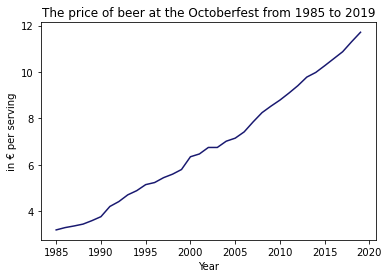

In [245]:
### Let's plot the development of the price of beer at the Octoberfest from 1985 to 2019 as a line plot with Matplotlib:
plt.plot(df_beer_price['jahr'], df_beer_price['bier_preis'], color='midnightblue')
plt.title('The price of beer at the Octoberfest from 1985 to 2019')
plt.xlabel('Year')
plt.ylabel('in € per serving');
### This graph clearly shows one trend, namely that beer prices have been steadily increasing throughout the years
### Although not adapted for inflation (with a deflator for example) in this case, 
### perceived ever higher prices for beer at the Octoberfest have been a recurring hot subject in the public and in media
### This trend is robust, even if we exclude the years prior to 2000

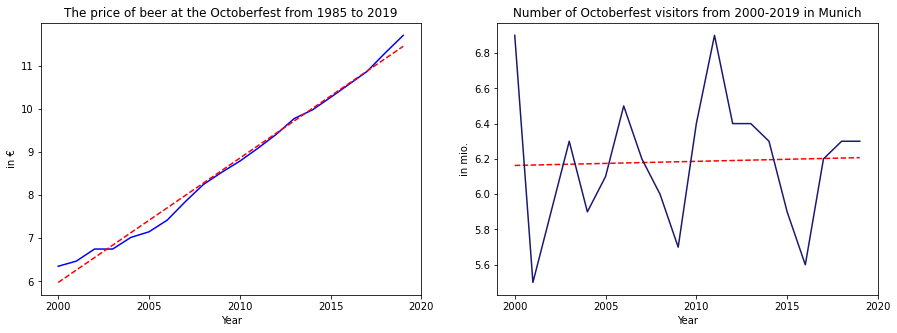

In [319]:
### Let's now plot all the key variables in terms of the Octoberfest to gain a better insight of the underlying trends
years = [np.float64((2000+year)) for year in range(20)]

### Let's exlude the years before 2000
### As our weather dataset contains information only for after the year 2000
df_beer_price = df_beer_price[df_beer_price['jahr'].isin(years)]
years = df_beer_price['jahr']

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=[15,5], sharex=True)

fit = np.polyfit(years, df_beer_price['bier_preis'], 1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*years + intercept
ax1.plot(years, df_beer_price['bier_preis'], color='blue')
ax1.plot(years, fit_eq, "r--")
ax1.set_title('The price of beer at the Octoberfest from 1985 to 2019')
ax1.set_xlabel('Year')
ax1.set_ylabel('in €')
ax1.set_xticks([2000,2005,2010,2015,2020])

fit = np.polyfit(years, df_visitors['besucher_gesamt'], 1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*years + intercept
ax2.plot(years, fit_eq, "r--")
ax2.plot(df_visitors['jahr'], df_visitors['besucher_gesamt'], color='midnightblue')
ax2.set_title('Number of Octoberfest visitors from 2000-2019 in Munich')
ax2.set_xlabel('Year')
ax2.set_ylabel('in mio.')
ax2.set_xticks([2000,2005,2010,2015,2020]);
### As we have previously determined visually, prices of beer have been increasing,
### while the number of visitors (despite the outliers) has remained approximately constant
### We can therefore conclude that higher prices do not seem to have negatively impacted numbers of visitors
### However it could likewise be the case that more visitors would have visited the Munich Octoberfest,
### if beer prices had not increased by that extent

## Have changing prices of beer and the weather affected numbers of visitors?
For tackling this question, we will **mutually plot** all of our key variables regarding weather and the Octoberfest:

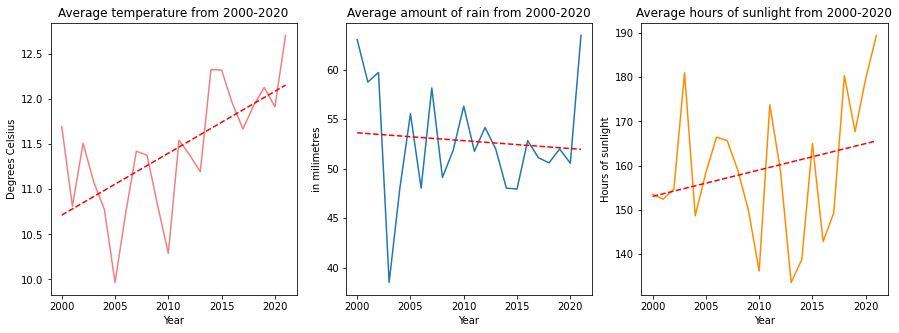

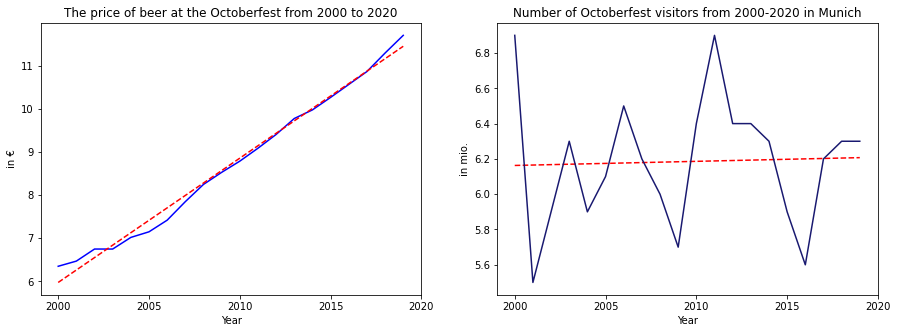

In [322]:
years = df_temp.groupby(by='JAHR').mean().index

fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=[15,5], sharex=True)

fit = np.polyfit(years, df_temp.groupby(by='JAHR').mean(), 1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*years + intercept
ax1.plot(years, df_temp.groupby(by='JAHR').mean(), color='lightcoral')
ax1.plot(years, fit_eq, "r--")

fit = np.polyfit(years, df_rain.groupby(by='JAHR').mean(), 1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*years + intercept
ax2.plot(years, df_rain.groupby(by='JAHR').mean())
ax2.plot(years, fit_eq, "r--")

fit = np.polyfit(years, df_sun.groupby(by='JAHR').mean(), 1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*years + intercept
ax3.plot(years, df_sun.groupby(by='JAHR').mean(), color='darkorange')
ax3.plot(years, fit_eq, "r--")

ax1.set_title('Average temperature from 2000-2020')
ax1.set_xlabel('Year')
ax1.set_ylabel('Degrees Celsius')

ax2.set_title('Average amount of rain from 2000-2020')
ax2.set_xlabel('Year')
ax2.set_ylabel('in milimetres')

ax3.set_title('Average hours of sunlight from 2000-2020')
ax3.set_xlabel('Year')
ax3.set_ylabel('Hours of sunlight')

years = [np.float64((2000+year)) for year in range(20)]

### Let's exlude the years before 2000
### As our weather dataset contains information only for after the year 2000
df_beer_price = df_beer_price[df_beer_price['jahr'].isin(years)]
years = df_beer_price['jahr']

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=[15,5], sharex=True)

fit = np.polyfit(years, df_beer_price['bier_preis'], 1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*years + intercept
ax1.plot(years, df_beer_price['bier_preis'], color='blue')
ax1.plot(years, fit_eq, "r--")
ax1.set_title('The price of beer at the Octoberfest from 2000 to 2020')
ax1.set_xlabel('Year')
ax1.set_ylabel('in €')
ax1.set_xticks([2000,2005,2010,2015,2020])

fit = np.polyfit(years, df_visitors['besucher_gesamt'], 1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*years + intercept
ax2.plot(years, fit_eq, "r--")
ax2.plot(df_visitors['jahr'], df_visitors['besucher_gesamt'], color='midnightblue')
ax2.set_title('Number of Octoberfest visitors from 2000-2020 in Munich')
ax2.set_xlabel('Year')
ax2.set_ylabel('in mio.')
ax2.set_xticks([2000,2005,2010,2015,2020]);

While we have our key variables regarding the weather in the **top row**, our key variables with respect to the Octoberfest can be found in the **bottom row**; the time dimensions match, as we have previously adjusted for the fact that both datasets do not display the same number of years (the dataset on the Octoberfest does not contain information on years prior to 2000).

One very striking result concerns the potential assertion that both the weather and beer prices **do not seem to have impacted numbers of visitors** of the Octoberfest; on average. However, it seems sensible to assume that the employed variables in this analysis are rather few and therefore not sufficient for providing a more comprehensive view on this question.

However, one interesting insight concerns the sharp downfall in visitors in 2003, which seems to coincide with a sharp reduction of rainfall in 2003. This could indicate that the **weather had been very hot**, and as the Octoberfest takes mostly place outside and no air conditioning tends to be available inside of the tents, this could explain why **some visitors might have refrained from attending**. 

Another interesting observation concerns the second sharp drop of visitors in 2009, which is approximately matched by a downturn in overall sunlight and subsequently followed by a positive trend in both dimensions. This could be interpreted as **more visitors are willing to attend the Octoberfest with good weather and plenty of sunlight**. This potential underlying mechanism can further be corroborated by the drop in visitors in 2016 - a period where sunlight exposure likewise has been declining.

## Conclusion
**Numbers of visitors seem to be driven primarily by the number of hours of sunlight available** on average in a particular time period; this seems sensible because while the festivities themselves take place in tents, oftentimes during the day of the visit more time is spent outside right before entering the tent, in between and afterwards when further leisure activities are pursued. This would allow us to conclude that the primary driver for successful (and hence profitable) Octoberfests tends to be cloudless skies and therefore overall good weather.

Temperature, rain and beer prices **do not seem to have an overly strong effect on visitors**. However, the analysis is rather simplistic and further variables and robustness- and sanity-checks would have to be conducted to provide a more comprehensive picture.